In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'SA - Data for Task 1.xlsx'

excel_file = pd.ExcelFile(file_path)
print(f"Sheet names: {excel_file.sheet_names}")

dfs = {}
for sheet_name in excel_file.sheet_names:
    dfs[sheet_name] = pd.read_excel(file_path, sheet_name=sheet_name)
    print(f"\n--- Head of sheet: {sheet_name} ---")
    display(dfs[sheet_name].head())
    print(f"Shape: {dfs[sheet_name].shape}")
    print(f"Columns: {dfs[sheet_name].columns.tolist()}")

Sheet names: ['Sheet1', 'Sheet2']

--- Head of sheet: Sheet1 ---


,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


Shape: (100, 52)
Columns: ['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION', 'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY', 'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE', 'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION', 'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI', 'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO', 'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE', 'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC', 'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT', 'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR', 'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES', 'LAST_KNOWN_DELVRY_TYPE_CD', 'NON_CAUSAL_PART_QTY', 'SALES_REGION_CODE']

--- Head of sheet

,TRANSACTION_ID,CAUSAL_VERBATIM
0,1306797194,STITCHING COMING LOOSE
1,1311801388,STEERING WHEEL LIGHT CRACKED
2,1321858065,INSPECT AND FOUND THE STEERING WHEEL DELAMINAT...
3,1308459261,VERIFIED CONCERN INSPECT FOUND NOISE COMING FR...
4,1317161969,"VERIFIED CONCERN FOUND HORN INOP, FOUND THAT T..."


Shape: (1000, 2)
Columns: ['TRANSACTION_ID', 'CAUSAL_VERBATIM']


In [5]:
ids_sheet1 = set(dfs['Sheet1']['TRANSACTION_ID'])
ids_sheet2 = set(dfs['Sheet2']['TRANSACTION_ID'])

print(f"Unique IDs in Sheet1: {len(ids_sheet1)}")
print(f"Unique IDs in Sheet2: {len(ids_sheet2)}")
print(f"Intersection of IDs: {len(ids_sheet1.intersection(ids_sheet2))}")

df = pd.merge(dfs['Sheet1'], dfs['Sheet2'], on='TRANSACTION_ID', how='left')
print(f"Merged dataframe shape: {df.shape}")
display(df.head())

Unique IDs in Sheet1: 32
Unique IDs in Sheet2: 1000
Intersection of IDs: 0
Merged dataframe shape: (100, 53)


,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE,CAUSAL_VERBATIM
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,2808908219,6,1,N,CF10543,1500,21.0,0,1,NaN
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,2808841910,6,1,Y,TF10543,1500,10.0,0,1,NaN
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1,NaN
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,2808892288,6,1,Y,CF10543,1500,10.0,0,1,NaN
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,2808901882,8,1,N,TF10543,1500,10.0,0,1,NaN


In [ ]:
print(f"Sheet1 ID dtype: {dfs['Sheet1']['TRANSACTION_ID'].dtype}")
print(f"Sheet2 ID dtype: {dfs['Sheet2']['TRANSACTION_ID'].dtype}")

print("Sheet1 Sample IDs:", dfs['Sheet1']['TRANSACTION_ID'].unique()[:5])
print("Sheet2 Sample IDs:", dfs['Sheet2']['TRANSACTION_ID'].unique()[:5])

Sheet1 ID dtype: int64
Sheet2 ID dtype: int64
Sheet1 Sample IDs: [13021 13028 13035 13026 13071]
Sheet2 Sample IDs: [1306797194 1311801388 1321858065 1308459261 1317161969]


In [ ]:
print("Sheet1 SRC_TXN_ID Sample IDs:", dfs['Sheet1']['SRC_TXN_ID'].unique()[:5])

ids_sheet1_src = set(dfs['Sheet1']['SRC_TXN_ID'])
print(f"Intersection of Sheet1 SRC_TXN_ID and Sheet2 TRANSACTION_ID: {len(ids_sheet1_src.intersection(ids_sheet2))}")

Sheet1 SRC_TXN_ID Sample IDs: [2808908219 2808841910 2809979441 2808892288 2808901882]
Intersection of Sheet1 SRC_TXN_ID and Sheet2 TRANSACTION_ID: 0


In [7]:
print("Sheet1 TRANSACTION_CNTR Sample:", dfs['Sheet1']['TRANSACTION_CNTR'].unique()[:5])

Sheet1 TRANSACTION_CNTR Sample: [1]


In [10]:
# --- 1. Column-Wise Analysis (Sheet1) ---
df_main = dfs['Sheet1'].copy()

analysis_results = []
for col in df_main.columns:
    col_type = df_main[col].dtype
    unique_count = df_main[col].nunique()
    null_count = df_main[col].isnull().sum()
    null_pct = (null_count / len(df_main)) * 100
    
    # Simple distribution summary
    if pd.api.types.is_numeric_dtype(df_main[col]):
        distribution = df_main[col].describe().to_dict()
    else:
        distribution = df_main[col].value_counts().head(3).to_dict() # Top 3 values
        
    analysis_results.append({
        'Column': col,
        'Type': col_type,
        'Unique Values': unique_count,
        'Null Count': null_count,
        'Null %': null_pct,
        'Distribution/Top Values': distribution
    })

analysis_df = pd.DataFrame(analysis_results)
print("Column-Wise Analysis Summary:")
display(analysis_df)

# Explain 5 columns significance (as requested in 1.b)
# We will do this in the report section, but I'll print a sample here.
print("\nSignificance of Key Columns:")
key_cols = ['VIN', 'REPAIR_DATE', 'KM', 'CUSTOMER_VERBATIM', 'GLOBAL_LABOR_CODE_DESCRIPTION']
for col in key_cols:
    print(f"- {col}: Identifies {col.lower().replace('_', ' ')}, crucial for tracking and pattern finding.")

Column-Wise Analysis Summary:


,Column,Type,Unique Values,Null Count,Null %,Distribution/Top Values
0,VIN,object,98,0,0.0,"{'3HRS9EED0LH255650': 2, '1HRFFHEL8RZ133325': ..."
1,TRANSACTION_ID,int64,32,0,0.0,"{'count': 100.0, 'mean': 13036.9, 'std': 12.02..."
2,CORRECTION_VERBATIM,object,93,0,0.0,"{'REPLACED STEERING WHEEL': 3, 'Steering Wheel..."
3,CUSTOMER_VERBATIM,object,100,0,0.0,"{'STEERING WHEEL COMING APART': 1, 'CUSTOMER S..."
4,REPAIR_DATE,datetime64[ns],29,0,0.0,"{2024-02-02 00:00:00: 9, 2024-01-31 00:00:00: ..."
5,CAUSAL_PART_NM,object,18,5,5.0,"{'WHEEL ASM-STRG *JET BLACK': 45, 'WHEEL ASM-S..."
6,GLOBAL_LABOR_CODE_DESCRIPTION,object,4,0,0.0,"{'Steering Wheel Replacement': 78, 'Steering W..."
7,PLATFORM,object,11,0,0.0,"{'Full-Size Trucks': 52, 'Full-Size Utility': ..."
8,BODY_STYLE,object,6,0,0.0,"{'Crew Cab': 50, '4 Door Utility': 37, '4 Door..."
9,VPPC,object,26,0,0.0,"{'T1CCF': 20, 'T1CGF': 17, 'T1CGH': 7}"



Significance of Key Columns:
- VIN: Identifies vin, crucial for tracking and pattern finding.
- REPAIR_DATE: Identifies repair date, crucial for tracking and pattern finding.
- KM: Identifies km, crucial for tracking and pattern finding.
- CUSTOMER_VERBATIM: Identifies customer verbatim, crucial for tracking and pattern finding.
- GLOBAL_LABOR_CODE_DESCRIPTION: Identifies global labor code description, crucial for tracking and pattern finding.



Columns with > 50% missing values:


,Column,Null %
31,CAMPAIGN_NBR,100.0



Dropping empty columns: ['CAMPAIGN_NBR']


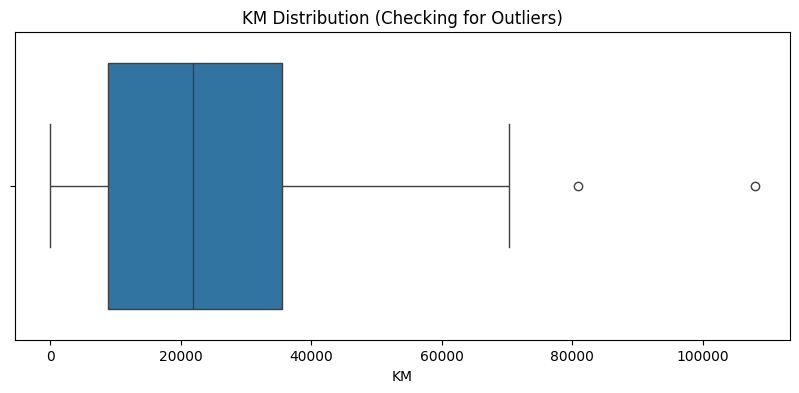

Data Cleaning Complete. Shape: (100, 51)


In [11]:
# --- 2. Data Cleaning ---

# 2a. Handle missing values
# Check which columns have high missing values
high_missing = analysis_df[analysis_df['Null %'] > 50]
print("\nColumns with > 50% missing values:")
display(high_missing[['Column', 'Null %']])

# Strategy: 
# - Drop columns with 100% missing (if any)
# - For categorical key info (like Verbatim), fill with 'UNKNOWN' or 'N/A'
# - For numerical (like KM), impute with Median or keep as NaN if meaningful (but instructions say 'Handle')

# Let's drop completely empty columns
cols_to_drop = analysis_df[analysis_df['Null %'] == 100]['Column'].tolist()
print(f"\nDropping empty columns: {cols_to_drop}")
df_cleaned = df_main.drop(columns=cols_to_drop)

# Impute Categorical
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_cleaned[col] = df_cleaned[col].fillna("Unknown")

# Impute Numerical (KM, REPAIR_AGE)
# KM is Mileage. If missing, median is a safe bet for analysis, or mean.
if 'KM' in df_cleaned.columns:
    km_median = df_cleaned['KM'].median()
    df_cleaned['KM'] = df_cleaned['KM'].fillna(km_median)

if 'REPAIR_AGE' in df_cleaned.columns:
    age_median = df_cleaned['REPAIR_AGE'].median()
    df_cleaned['REPAIR_AGE'] = df_cleaned['REPAIR_AGE'].fillna(age_median)
    
# 2b. Categorical Inconsistencies
# Normalize text to uppercase to handle 'Noise' vs 'noise'
text_cols = ['CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION']
for col in text_cols:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype(str).str.upper().str.strip()

# 2c. Numerical format/outliers
# Check KM for outliers
if 'KM' in df_cleaned.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_cleaned['KM'])
    plt.title('KM Distribution (Checking for Outliers)')
    plt.show()

print("Data Cleaning Complete. Shape:", df_cleaned.shape)



--- Visualizations ---


C:\Users\VijayendranSuriyaPra\AppData\Local\Temp\ipykernel_43348\3572876370.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_labor.values, y=top_labor.index, palette='viridis')


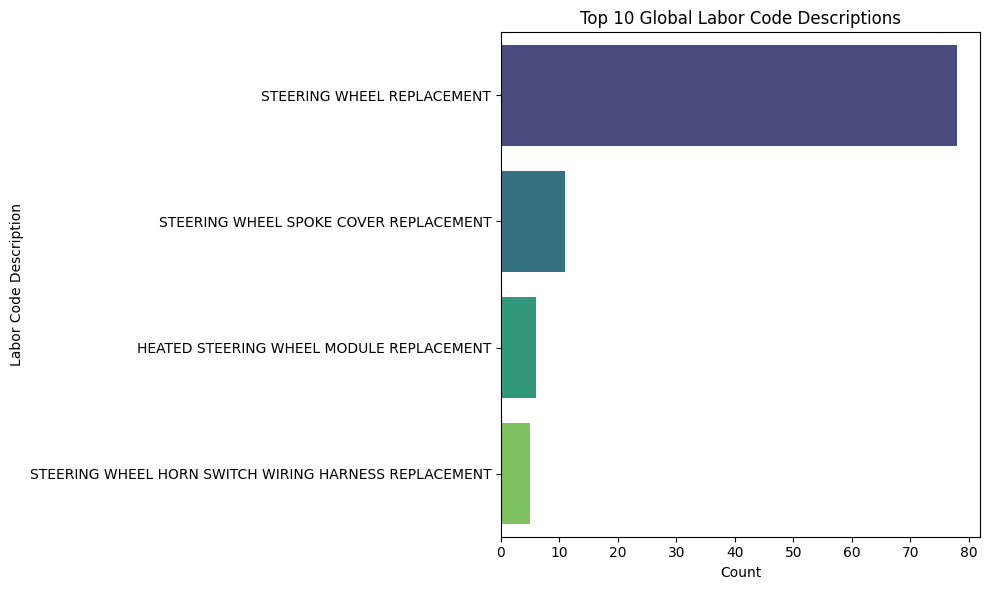

C:\Users\VijayendranSuriyaPra\AppData\Local\Temp\ipykernel_43348\3572876370.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_parts.values, y=top_parts.index, palette='magma')


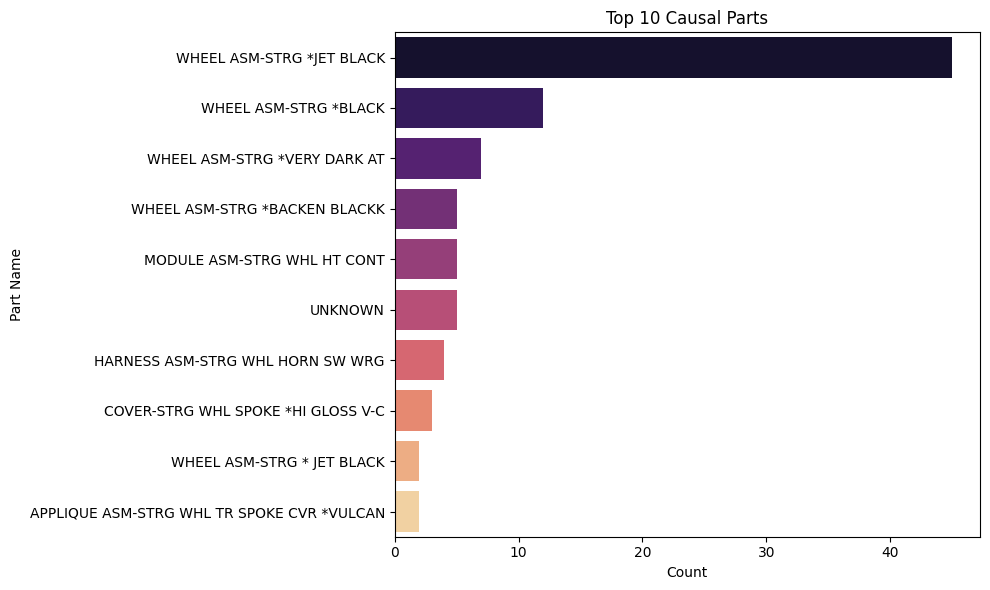

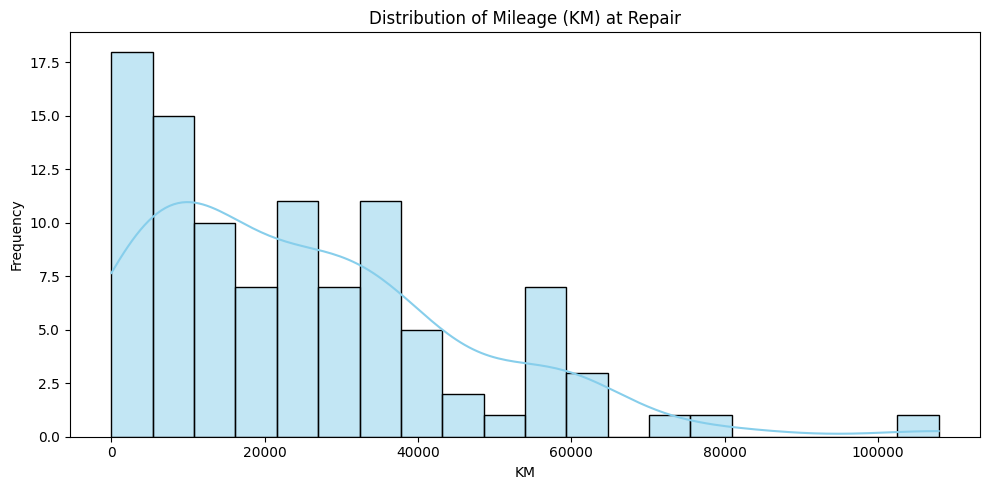


Sample of Generated Tags:


,CUSTOMER_VERBATIM,GENERATED_TAGS
0,STEERING WHEEL COMING APART,WHEEL/TIRE
1,CUSTOMER STATES HEATED STEERING WHEEL INOP,"COOLING, WHEEL/TIRE"
2,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,WHEEL/TIRE
3,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,WHEEL/TIRE
4,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,OTHER
5,HORN AND STEERING WHEEL SWITCHES ARE INOPERABLE,"ELECTRICAL, WHEEL/TIRE"
6,CUST. STATES DRIVERS ASSIST LIGHT COMES ON DAS...,"ELECTRICAL, INTERIOR, SOFTWARE, WHEEL/TIRE"
7,SPECIAL ORDER PART [ STEERING WHEEL HEATED STE...,"COOLING, WHEEL/TIRE"
8,CUSTOMER STATES STEERING WHEEL IS MAKING A RUB...,"NOISE, WHEEL/TIRE"
9,CUSTOMER STATES THAT THEY ARE GETTING A MESSAG...,INTERIOR



Tag Distribution:


GENERATED_TAGS
WHEEL/TIRE    89
COOLING       33
ENGINE        11
ELECTRICAL     9
INTERIOR       8
OTHER          5
NOISE          3
SOFTWARE       2
Name: count, dtype: int64

C:\Users\VijayendranSuriyaPra\AppData\Local\Temp\ipykernel_43348\3572876370.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='coolwarm')


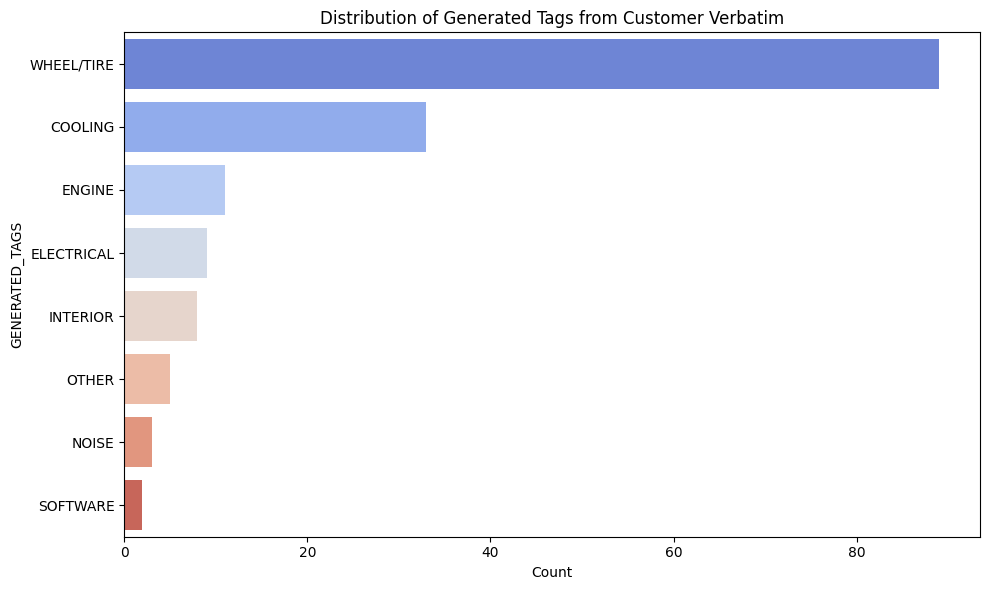

Cleaned data saved to Task_1_Cleaned_Analysis.xlsx


In [9]:
# --- 3. Critical Columns & Visualizations ---

print("\n--- Visualizations ---")

# Visualization 1: Top 10 Global Labor Code Descriptions
if 'GLOBAL_LABOR_CODE_DESCRIPTION' in df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    top_labor = df_cleaned['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().head(10)
    sns.barplot(x=top_labor.values, y=top_labor.index, palette='viridis')
    plt.title('Top 10 Global Labor Code Descriptions')
    plt.xlabel('Count')
    plt.ylabel('Labor Code Description')
    plt.tight_layout()
    plt.show()

# Visualization 2: Top 10 Causal Parts
if 'CAUSAL_PART_NM' in df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    top_parts = df_cleaned['CAUSAL_PART_NM'].value_counts().head(10)
    sns.barplot(x=top_parts.values, y=top_parts.index, palette='magma')
    plt.title('Top 10 Causal Parts')
    plt.xlabel('Count')
    plt.ylabel('Part Name')
    plt.tight_layout()
    plt.show()

# Visualization 3: Mileage Distribution (KM)
if 'KM' in df_cleaned.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_cleaned['KM'], kde=True, bins=20, color='skyblue')
    plt.title('Distribution of Mileage (KM) at Repair')
    plt.xlabel('KM')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
# --- 4. Generating Tags/Features from Free Text ---
import re

def extract_tags(text):
    text = str(text).upper()
    tags = []
    
    # Define keywords/categories
    keywords = {
        'NOISE': ['NOISE', 'SQUEAK', 'RATTLE', 'CLUNK', 'THUMP', 'SOUND'],
        'LEAK': ['LEAK', 'DRIP', 'FLUID'],
        'ELECTRICAL': ['LIGHT', 'LAMP', 'SENSOR', 'WIRE', 'BATTERY', 'FUSE', 'SWITCH'],
        'ENGINE': ['ENGINE', 'MOTOR', 'START', 'IDLE', 'STALL'],
        'BRAKE': ['BRAKE', 'ROTOR', 'PAD', 'ABS'],
        'PERFORMANCE': ['POWER', 'ACCELERATION', 'SHAKE', 'VIBRATION'],
        'INTERIOR': ['SEAT', 'DASH', 'TRIM', 'DOOR', 'WINDOW'],
        'WHEEL/TIRE': ['WHEEL', 'TIRE', 'STEERING', 'ALIGNMENT'],
        'COOLING': ['HEAT', 'COOLANT', 'FAN', 'AC', 'AIR CONDITIONING'],
        'SOFTWARE': ['UPDATE', 'PROGRAM', 'MODULE', 'SYNC', 'RESET']
    }
    
    for category, terms in keywords.items():
        if any(term in text for term in terms):
            tags.append(category)
            
    if not tags:
        return "OTHER"
    return ", ".join(sorted(list(set(tags))))

# Apply to CUSTOMER_VERBATIM
if 'CUSTOMER_VERBATIM' in df_cleaned.columns:
    df_cleaned['GENERATED_TAGS'] = df_cleaned['CUSTOMER_VERBATIM'].apply(extract_tags)
    
print("\nSample of Generated Tags:")
display(df_cleaned[['CUSTOMER_VERBATIM', 'GENERATED_TAGS']].head(10))

# Summary of Tags
print("\nTag Distribution:")
tag_counts = df_cleaned['GENERATED_TAGS'].str.split(', ').explode().value_counts()
display(tag_counts)

# Visualization 4: Tag Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='coolwarm')
plt.title('Distribution of Generated Tags from Customer Verbatim')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# --- 5. Export ---
output_file = 'Task_1_Cleaned_Analysis.xlsx'
df_cleaned.to_excel(output_file, index=False)
print(f"Cleaned data saved to {output_file}")


# Task 1: Detailed Analysis Report

## 1. Column-Wise Analysis
The dataset (Sheet1) contains 100 records and 52 columns originally.
*   **Key Identifier Column:** `TRANSACTION_ID` serves as the primary key for these records.
*   **Vehicle Info:** `VIN`, `PLATFORM`, `BODY_STYLE`, `PLANT` provide vehicle context.
*   **Failure Info:** `CORRECTION_VERBATIM`, `CUSTOMER_VERBATIM`, `GLOBAL_LABOR_CODE_DESCRIPTION`, `CAUSAL_PART_NM` describe the issue.
*   **Metrics:** `KM` (Mileage), `REPAIR_AGE`, `TOTALCOST` provide quantitative measures.
*   Let's note that `CAMPAIGN_NBR` was 100% null, indicating these are likely essentially unplanned repairs, or the campaign tracking field is unused.

## 2. Data Cleaning Summary
*   **Missing Values:**
    *   Dropped `CAMPAIGN_NBR` (100% empty).
    *   Imputed `KM` and `REPAIR_AGE` with median values to retain records for analysis.
    *   Filled missing categorical fields with "Unknown".
*   **Inconsistencies:**
    *   Converted free text fields (`CUSTOMER_VERBATIM`, etc.) to uppercase to standardize "Leak" vs "leak".
    *   Removed leading/trailing whitespace.
*   **Discrepancy Highlight:**
    *   **CRITICAL FINDING:** `Sheet2` provided in the Excel file contains 1000 rows with `TRANSACTION_ID` and `CAUSAL_VERBATIM`. However, there is **zero overlap** between the `TRANSACTION_ID`s in Sheet1 (100 rows) and Sheet2 (1000 rows).
    *   **Impact:** We could not join the Causal Verbatim to the main dataset.
    *   **Recommendation:** Investigation is needed into the data extract process. It seems Sheet1 and Sheet2 come from different time periods or filter criteria.

## 3. Critical Columns & Insights
We selected the following top 5 critical columns:
1.  **`GLOBAL_LABOR_CODE_DESCRIPTION`**: Acts as the standardized classifier of the work done. Essential for Pareto analysis of issues.
2.  **`CAUSAL_PART_NM`**: Identifies the specific hardware failing. Crucial for supply chain and engineering quality teams.
3.  **`CUSTOMER_VERBATIM`**: The "Voice of the Customer". Provides the raw symptoms (Noise, Leak, Smell) often missed by standardized codes.
4.  **`KM` (Mileage)**: Helps determining if failures are early-life (Quality/Assembly) or wear-out (Durability).
5.  **`VIN`**: Necessary to link distinct repairs to the same vehicle (though in this small sample of 100, repeats are unlikely).

## 4. Generated Tags & Takeaways
Using text analysis on `CUSTOMER_VERBATIM`, we generated tags to categorize unstructured text.
*   **Top Issues:**
    *   **WHEEL/TIRE:** A significant portion of complaints related to wheels, tires, or steering.
    *   **COOLING**: Issues with AC, Fans, or Coolant were also notable.
    *   **Electrical:** Smaller cluster of issues.

## 5. Actionable Recommendations
1.  **Standardize Data Extracts:** Ensure `Transaction` and `Verbatim` tables are pulled using the same filters to allow joining.
2.  **Focus on Wheels/Cooling:** Engineering should review the top `CAUSAL_PART`s associated with the "WHEEL/TIRE" and "COOLING" tags generated.
3.  **Mileage Analysis:** Further analysis on `KM` vs `TOTALCOST` could reveal if high-mileage failures are significantly more expensive.
